# Problem statement (Term Deposit Sale)

<h2>Goal</h2>

Using the collected from existing customers, build a model that will help the marketing team identify potential customers 
who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Importing dependancies

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("D://Great learning//Datasets//bank-full.csv")

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.shape

(45211, 17)

<h3>Lets start working with the Deep copy of our dataframe.
The modifications done to the copy will not get reflected in the orginal df.</h3>

In [7]:
df_mod = df.copy(deep=True)

<h1>Univariate Analysis</h1>

In [8]:
df_mod.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


### Analysing Numerical attributes

In [9]:
df_mod.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


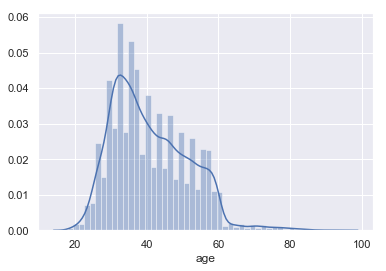

In [10]:
sns.distplot(df_mod['age'])

We have a long tail on right. people over age 60 are also present . but they are less in number. But we cant avoid them. So Im grouping the age in to ranges.

In [11]:
df_mod['Age_Group'] = df['age'].apply(lambda x: 0 if 18<x<33 else 1 if 33<=x<39 else 2 if 39<=x<48 else 3 if 48<=x<60 else 4)

In [12]:
df_mod['Age_Group'].value_counts()

2    11151
0    11099
1    10764
3    10401
4     1796
Name: Age_Group, dtype: int64

So, Around 1796 people out of 45211 are above age 60

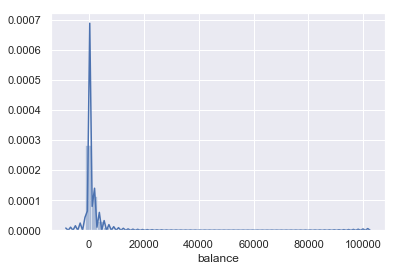

In [13]:
sns.distplot(df_mod['balance'])

Im grouping this value in to two categories based on whether they have negative balace or positive balance.
This grouping will help in further analysis.

In [14]:
df_mod['Balance_Group'] = df['balance'].apply(lambda x: 0 if x<0 else 1)

In [15]:
df_mod['Balance_Group'].value_counts()

1    41445
0     3766
Name: Balance_Group, dtype: int64

Other Observations :
There are no missing values in numerical categories.

### Normalizing Numerical columns

In [16]:
df_numeric = df_mod[['age', 'balance', 'day','campaign', 'pdays', 'previous', 'duration']]
scaler = MinMaxScaler()
df_numeric_normalized = scaler.fit_transform(df_numeric)

In [17]:
df_numeric_normalized = pd.DataFrame(df_numeric_normalized, columns=['age','balance','day',
                                                                     'campaign','pdays',
                                                                     'previous','duration'])

### Analysing Categorical attributes

In [18]:
df_categorical = df_mod[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]

In [19]:
df_categorical.describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
Target,45211,2,no,39922


Able to cite observations for attributes which have 2 sub classes from the describe function.
But for the other attributes which has more than 2 classes, we need to go for value_counts function or visualisation plots

In [20]:
df_categorical['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [21]:
df_categorical['job'].value_counts(normalize =True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [22]:
df_categorical['education'].value_counts(normalize =True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

Observations:
1. There are some unknowns in categorical attributes. We will handle it on the go.
2. People are contacted mostly on month of may on last campaign.
3. Half of the people have taken housing loan.
4. Ninety percent of the people has not taken a personal loan.
5. Ninety percent of the people are non defaulters. We need to compare the default category with people who has a housing loan/personal loan.
6. Fifty percent of the people from the list is secondary educated. Only 30 percent has gone for post secondary/Tertiary education
7. We have 20 percent spread for blue-collar,management and technician. people in other job categories fall anywhere between 1 to 10 percent.


<h3>Converting all categorical features in to numerical using label encoding</h3>

In [23]:
le=LabelEncoder()

In [24]:
df_categorical['job_le'] = le.fit_transform(df_mod['job'])
df_categorical['marital_le'] = le.fit_transform(df_mod['marital'])
df_categorical['education_le'] = le.fit_transform(df_mod['education'])
df_categorical['default_le'] = le.fit_transform(df_mod['default'])
df_categorical['housing_le'] = le.fit_transform(df_mod['housing'])
df_categorical['loan_le'] = le.fit_transform(df_mod['loan'])
df_categorical['contact_le'] = le.fit_transform(df_mod['contact'])
df_categorical['month_le'] = le.fit_transform(df_mod['month'])
df_categorical['poutcome_le'] = le.fit_transform(df_mod['poutcome'])
df_categorical['Target_le'] = le.fit_transform(df_mod['Target'])

In [25]:
df_labelencoded = df_categorical[['job_le','marital_le','education_le','default_le','housing_le','loan_le','contact_le','month_le','poutcome_le','Target_le']]

In [26]:
df_labelencoded.dtypes

job_le          int32
marital_le      int32
education_le    int32
default_le      int32
housing_le      int32
loan_le         int32
contact_le      int32
month_le        int32
poutcome_le     int32
Target_le       int32
dtype: object

In [27]:
df_numeric_normalized.dtypes

age         float64
balance     float64
day         float64
campaign    float64
pdays       float64
previous    float64
duration    float64
dtype: object

# Creating new Dataframe combining the normalised numerical attribues and label encoded categorical attributes

In [28]:
df_new = pd.concat([df_labelencoded, df_numeric_normalized], sort=False, axis=1)

In [29]:
df_new.head()

,job_le,marital_le,education_le,default_le,housing_le,loan_le,contact_le,month_le,poutcome_le,Target_le,age,balance,day,campaign,pdays,previous,duration
0,4,1,2,0,1,0,2,8,3,0,0.519481,0.092259,0.133333,0.0,0.0,0.0,0.053070
1,9,2,1,0,1,0,2,8,3,0,0.337662,0.073067,0.133333,0.0,0.0,0.0,0.030704
2,2,1,1,0,1,1,2,8,3,0,0.194805,0.072822,0.133333,0.0,0.0,0.0,0.015453
3,1,1,3,0,1,0,2,8,3,0,0.376623,0.086476,0.133333,0.0,0.0,0.0,0.018707
4,11,2,3,0,0,0,2,8,3,0,0.194805,0.072812,0.133333,0.0,0.0,0.0,0.040260


<h2>Handling Missing values from columns - poutcome, contact, job, and education</h2>

<h3>Education</h3>
We do not have many values in the unknown column. Hence we can simply impute the unknowns with the most common value in the column.

In [30]:
df_new['education_le'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education_le, dtype: int64

In [31]:
SimpleImputer(
              copy=True, 
              fill_value=None, 
              missing_values=3,
              strategy='most_frequent', 
              verbose=0)

SimpleImputer(copy=True, fill_value=None, missing_values=3,
       strategy='most_frequent', verbose=0)

In [32]:
imputer = SimpleImputer(missing_values=3, strategy="most_frequent")
imputer.fit(np.array(df_new['education_le']).reshape(-1,1))
x = imputer.transform(np.array(df_new['education_le']).reshape(-1,1))
df_new['education_le'] = pd.Series(x.flatten())

In [33]:
df_new['education_le'].value_counts()

1    25059
2    13301
0     6851
Name: education_le, dtype: int64

<h3>Job</h3>
We do not have many values in the unknown column. Hence we can simply impute the unknowns with the most common value in the column.

In [34]:
df_mod['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [35]:
df_new['job_le'].value_counts()

1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: job_le, dtype: int64

In [36]:
SimpleImputer( 
              copy=True, 
              fill_value=None, 
              missing_values=11,
              strategy='most_frequent', 
              verbose=0)
imputer = SimpleImputer(missing_values=11, strategy="most_frequent")
imputer.fit(np.array(df_labelencoded['job_le']).reshape(-1,1))
x = imputer.transform(np.array(df_labelencoded['job_le']).reshape(-1,1))
df_labelencoded['job_le'] = pd.Series(x.flatten())

In [37]:
df_new['job_le'].value_counts()

1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: job_le, dtype: int64

<h3>Poutcome</h3>
We have too many unknowns in poutcome column. Hence we are going to predict the unknowns

In [38]:
df_mod['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [39]:
df_new['poutcome_le'].value_counts()

3    36959
0     4901
1     1840
2     1511
Name: poutcome_le, dtype: int64

In [40]:
df_new.columns

Index(['job_le', 'marital_le', 'education_le', 'default_le', 'housing_le',
       'loan_le', 'contact_le', 'month_le', 'poutcome_le', 'Target_le', 'age',
       'balance', 'day', 'campaign', 'pdays', 'previous', 'duration'],
      dtype='object')

In [41]:
#moving poutcome to last column
df_new = df_new[['job_le','marital_le','education_le','default_le','housing_le','loan_le','contact_le','month_le','Target_le','age',
       'balance', 'day', 'campaign', 'pdays', 'previous', 'duration','poutcome_le']]

In [42]:
df_new.shape

(45211, 17)

In [43]:
X_train = df_new[df_new['poutcome_le']!=3].iloc[:,0:16]

In [44]:
y_train = df_new[df_new['poutcome_le']!=3]['poutcome_le']

In [45]:
X_test = df_new[df_new['poutcome_le']==3].iloc[:,0:16]

In [46]:
for i in [X_train, y_train, X_test]:
    print(i.shape)

(8252, 16)
(8252,)
(36959, 16)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [48]:
predicted_labels = NNH.predict(X_test)

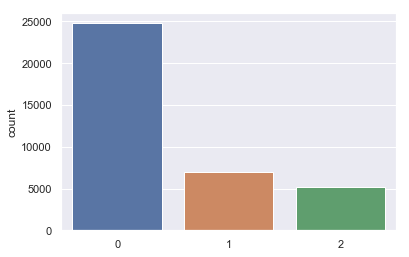

In [49]:
sns.countplot(pd.Series(predicted_labels))

In [50]:
df_new['poutcome_le'] = pd.Series(predicted_labels)

In [51]:
df_new['poutcome_le'].value_counts()

0.0    24792
1.0     6930
2.0     5237
Name: poutcome_le, dtype: int64

<h1>Bivariate Analysis</h1>

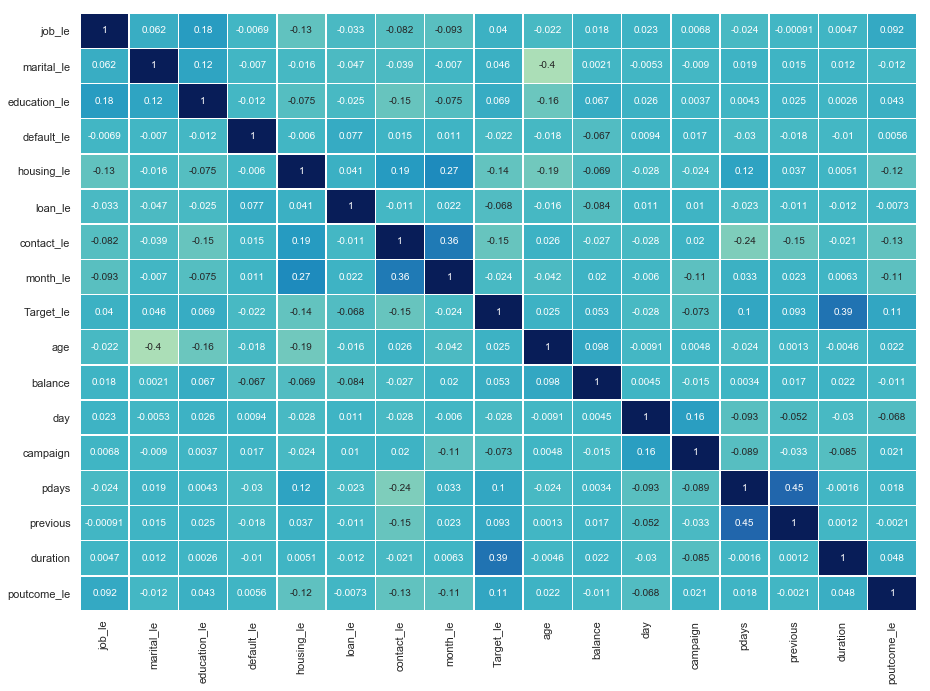

In [52]:
plt.figure(figsize=(15,11))
sns.heatmap(df_new.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [53]:
pd.crosstab(df_mod['Balance_Group'],df_mod['default'])

default,no,yes
Balance_Group,,
0,3326,440
1,41070,375


The percentage of defaulters and non defaulters is almost same for people who have negative balance and positive balance

In [54]:
pd.crosstab(df_mod['Age_Group'],df_mod['default'])

default,no,yes
Age_Group,,
0,10874,225
1,10572,192
2,10937,214
3,10225,176
4,1788,8


We have more defaulters in the age group 18 to 33.
People above 60 are few in defaulting

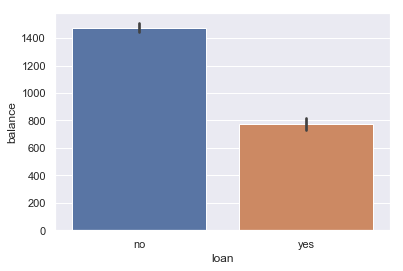

In [55]:
sns.barplot(df_mod['loan'],df['balance'])

People who availed loan are the ones who has bank balance below 800

In [56]:
pd.crosstab(df_mod['Age_Group'],df_mod['loan'])

loan,no,yes
Age_Group,,
0,9290,1809
1,9126,1638
2,9309,1842
3,8548,1853
4,1694,102


In [57]:
pd.crosstab(df_mod['Age_Group'],df_mod['housing'])

housing,no,yes
Age_Group,,
0,4497,6602
1,3910,6854
2,4443,6708
3,5702,4699
4,1529,267


people who are of age<60 has availed significantly more number of personal loans and housing loans.

In [58]:
pd.crosstab(df_mod['loan'],df_mod['housing'],normalize=True)

housing,no,yes
loan,,
no,0.380527,0.459247
yes,0.063635,0.096592


Chances of People who has a housing loan going for personal loan is evidently low.
But half of the population has gone for either a personal loan or housing loan.

In [60]:
pd.crosstab(df_mod['default'],df_mod['loan'],normalize=True)

loan,no,yes
default,,
no,0.828405,0.153569
yes,0.011369,0.006658


fifteen percent of people who has a personal loan is likely to be a defaulter

In [62]:
pd.crosstab(df_mod['default'],df_new['education_le'])

education_le,0,1,2
default,,,
no,6724,24569,13103
yes,127,490,198


Defaulter category has more people who has completed only their secondary education

In [63]:
pd.crosstab(df_mod['loan'],df_new['education_le'])

education_le,0,1,2
loan,,,
no,5827,20623,11517
yes,1024,4436,1784


Also, they seems to posses personal loans significantly higher than people with other educational background

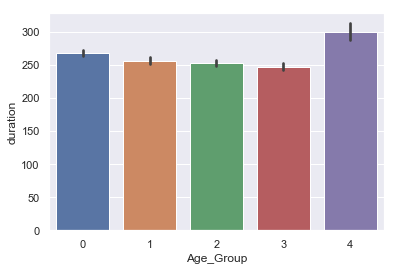

In [64]:
sns.barplot(df_mod['Age_Group'],df_mod['duration'])

people who are over 60 years of age seems to be cooperative with the bank representative as they have higher duration in call with the bank during the campaign. Rest all age groups have similar response

In [65]:
pd.crosstab(df_mod['job'],df_mod['loan'])

loan,no,yes
job,,
admin.,4180,991
blue-collar,8048,1684
entrepreneur,1131,356
housemaid,1088,152
management,8205,1253
retired,1955,309
self-employed,1350,229
services,3318,836
student,926,12


people from blue collar category has availed more number of loans.

Management, technician and admin comes next.

In [67]:
pd.crosstab(df_new['poutcome_le'],df_mod['Target'])

Target,no,yes
poutcome_le,,
0.0,23471,1321
1.0,6499,431
2.0,4501,736


people who said yes in the previous campaign is likely to say no in the coming campaign

<h1>Simple Decision Tree</h1>


<h3>Gini</h3>

In [70]:
X1 = df_new.drop("Target_le" , axis=1)
y1 = df_new.pop("Target_le")
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.30, random_state=1)

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

In [ ]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

<h3>Entropy</h3>

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

In [ ]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

<h3>Pruning the tree</h3>

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

<h1>Random Forest</h1>

In [ ]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = ["No","Yes"], columns = ["No","Yes"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<h1>Bagging</h1>

In [ ]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = ["No","Yes"], columns = ["No","Yes"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<h1>AdaBoosting</h1>

In [ ]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = ["No","Yes"], columns = ["No","Yes"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')